In [2]:
import numpy as np
from PIL import Image

In [3]:
#conda install -c anaconda pillow
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [7]:
im = Image.open('pic.tif')
h,w = np.shape(im)
tiffarray = np.zeros((h,w,im.n_frames))
for i in range(im.n_frames):
   im.seek(i)
   tiffarray[:,:,i] = np.array(im)
expim = tiffarray.astype(np.double);
print(expim[:,:,0].shape)


(512, 512)


In [122]:
imarray = np.array(im)
imarray.shape

(512, 512)

In [123]:
a = np.argsort(imarray)

In [124]:
imarray[318,111] = 0
np.max(imarray)

65535

In [125]:
index = np.where(imarray==np.max(imarray))

In [126]:
index


(array([381, 381, 381, 381, 382, 382, 382, 382, 382, 382, 383, 383, 383,
        383, 383, 383, 383, 384, 384, 384, 384, 384, 384, 384, 384, 385,
        385, 385, 385, 385, 385, 385, 385, 386, 386, 386, 386, 386, 386,
        386, 386, 387, 387, 387, 387, 387, 387, 388, 388, 388, 388]),
 array([295, 296, 297, 298, 294, 295, 296, 297, 298, 299, 294, 295, 296,
        297, 298, 299, 300, 293, 294, 295, 296, 297, 298, 299, 300, 293,
        294, 295, 296, 297, 298, 299, 300, 293, 294, 295, 296, 297, 298,
        299, 300, 294, 295, 296, 297, 298, 299, 295, 296, 297, 298]))

In [71]:
imcut = expim[0:300,0:300,:]

In [72]:
imcut.shape

(300, 300, 301)

In [16]:
def fit(x,y,x0, y0,sigma):
    g = (1/(2*np.pi*sigma**2))*np.exp(-((x-x0)**2+(y-y0)**2)/(2*sigma**2))
    return g

In [17]:
x, y = np.meshgrid(np.linspace(0,300,300),np.linspace(0,300,300))

In [181]:
z = imcut
z[79,199]
#np.where(z == np.max(z))

array([1401., 1452., 1562., 1219., 1072., 1642., 1332., 1346., 1629.,
       1298., 1241., 1361., 1234., 1301., 1034., 1068., 1266., 1160.,
        831., 1605., 1120., 1151., 1258., 1586., 1095., 1085., 1208.,
       1280., 1531., 1310.,  999., 1171., 1075., 1808., 1376., 1520.,
       1274., 1413., 1123., 1449., 1057., 1199., 1432., 1809., 1464.,
       1104., 1577., 1060., 1216., 2197., 1895., 1171., 1541., 1428.,
       1168., 1550.,  974., 1296., 1039., 1009., 1290., 1425.,  714.,
       1620., 1484., 1364., 1204.,  917., 1119., 1584.,  940., 1612.,
       1099.,  854., 1228., 1069.,  775.,  940.,  996., 1028., 1323.,
       1453.,  951.,  918., 1746.,  978.,  954., 1071., 1203.,  613.,
       1078., 1249., 1145., 1026., 1039., 1109.,  981., 1499., 1119.,
       1507., 1051., 1775.,  729., 1019., 1364.,  946., 1465., 1154.,
       1015., 1114., 1009., 1179.,  923., 1637., 1252.,  957., 1585.,
       1111., 1121.,  787., 1286., 1364., 1239.,  862., 1258., 1060.,
       1511., 1229.,

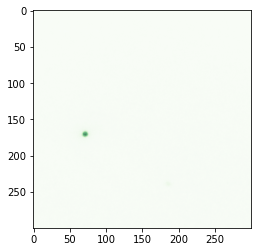

In [182]:
plt.imshow(z[:,:,52], cmap ="Greens", alpha = 0.7, 
           interpolation ='bilinear')

In [115]:
y = np.ones(20)

In [57]:
x = np.linspace(0,300,300)

In [58]:
def func(x,a,b,x0):
    return a*np.exp(-b*(x-x0)**2)

In [201]:

#opt = np.zeros((300,3,50))
x00 = []
x= np.linspace(0,300,300)

for n in range (50):
    index = np.where(imcut[:,:,n] == np.max(imcut[:,:,n]))
    print(index)
    x000 = []
    for i in range (index[0][0]-5,index[0][0]+5):
        #index2 = np.where(imcut[:,i,n] == np.max(imcut[:,i,n]))
        z = imcut[i,:,n]
        z = z/np.max(z)
        popt, _ = curve_fit(func, x,z)
        x000.append(popt[2])
    x00.append(np.mean(np.array(x000)))

(array([199]), array([82]))
(array([199]), array([82]))
(array([199]), array([80]))
(array([198]), array([84]))
(array([198]), array([86]))
(array([198, 199]), array([86, 86]))
(array([197, 197, 197, 198, 198, 199, 199, 200]), array([84, 85, 86, 86, 87, 86, 87, 87]))
(array([191]), array([82]))


/home/arash/anaconda3/envs/netket2/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


(array([190]), array([74]))
(array([191]), array([76]))
(array([188]), array([69]))
(array([191]), array([74]))
(array([192]), array([73]))
(array([192]), array([71]))
(array([193]), array([69]))
(array([195]), array([67]))
(array([193]), array([68]))
(array([195]), array([68]))
(array([193]), array([70]))
(array([194]), array([69]))
(array([194]), array([69]))
(array([193]), array([68]))
(array([192]), array([69]))
(array([190]), array([77]))
(array([188]), array([77]))
(array([191]), array([80]))
(array([190]), array([78]))
(array([187]), array([75]))
(array([189]), array([79]))
(array([186]), array([75]))
(array([182]), array([71]))
(array([180]), array([73]))
(array([181]), array([69]))
(array([183]), array([72]))
(array([184]), array([70]))
(array([181]), array([70]))
(array([176]), array([70]))
(array([176]), array([68]))
(array([177]), array([63]))
(array([180]), array([64]))
(array([180]), array([65]))
(array([184]), array([64]))
(array([182]), array([64]))
(array([181]), array

In [196]:
y0 = []
x= np.linspace(0,40,40)
for n in range (50):
    index = np.where(imcut[:,:,n] == np.max(imcut[:,:,n]))
    #print(index[1][0])
    print(n)
    y00 = []
    for i in range (index[1][0]-5,index[1][0]+5):
        index2 = np.where(imcut[:,i,n] == np.max(imcut[:,i,n]))
        z = imcut[index2[0][0]-20:index2[0][0]+20,i,n]
        z = z/np.max(z)
        popt, _ = curve_fit(func, x,z)
        y00.append(popt[2]/2+index2[0][0])
    y0.append(np.mean(np.array(y00)))


0
1
2
3
4
5
6
7
8
9
10
11


/home/arash/anaconda3/envs/netket2/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [162]:

for i in range (82,83):
    z = imcut[:,i,7]
    z = z/np.max(z)
    popt, _ = curve_fit(func, x,z)

/home/arash/anaconda3/envs/netket2/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

/home/arash/anaconda3/envs/netket2/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


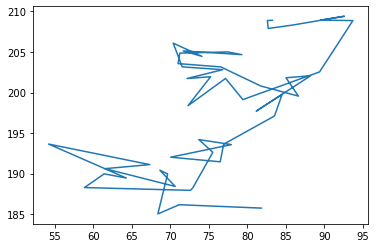

In [207]:
#print(z[:,:].shape)
#plt.scatter(x,imcut[:,82,0])
#plt.plot(x,func(x, *popt))
x= np.linspace(0,50,50)
popt, _ = curve_fit(func, x ,imcut[170:220,82,7])
#plt.plot(x,func(x, *popt))
plt.plot(x00,y0)


In [135]:
popt, _ = curve_fit(func, x,z)

In [136]:
popt

array([ 0.74587587,  0.14588237, 10.15765459])